In [ ]:
# 30个频率频道 116*116输入   3种不同3dcnn模型的对比  

In [ ]:
# !pip install import-ipynb
# import import_ipynb

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential 
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# %cp -av fromfolder tofolder
# %cd "/content/drive/My Drive/Newdata/"
# from model_functions import *

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

Data1 = np.load('/content/drive/My Drive/Newdata/shuffle_changedin3600.npy') 
Data2 = np.load('/content/drive/My Drive/Newdata/original/allcontrol.npy') 
# test_data = np.load('/content/drive/My Drive/Newdata/changed/allfu.npy') 
# Data4 = np.load('/content/drive/My Drive/Newdata/original/allfu.npy') 
train_label = np.load('/content/drive/My Drive/Newdata/shuffle_changedout3600.npy')
# data = np.concatenate((Data1,Data2), axis = 0)
Label = np.load('/content/drive/My Drive/Newdata/original/4800.npy')
train_data = np.reshape(Data1,(3600,30,116,116,1))
test_data = np.reshape(Data2,(1200,30,116,116,1)) 
# train_label = Label[1200:3600]
test_label = Label[:1200]


In [ ]:
data = np.load('/content/drive/My Drive/Newdata/shuffle_flattenin.npy')
label =  np.load('/content/drive/My Drive/Newdata/shuffle_flattenout.npy')


In [ ]:
print(data.shape)
print(label.shape)
# np.save("/content/drive/My Drive/Newdata/train_data",train_data)
# np.save("/content/drive/My Drive/Newdata/test_data",test_data)
result = []
for i in range(3600):
  TMP =[]
  for j in range(441):  
    if label[i,j] == 0:
      tmp = [1,0,0]
    if label[i,j] == 1:
      tmp = [0,1,0]
    if label[i,j] == 2:
      tmp = [0,0,1]
    TMP.append(tmp)
  result.append(TMP)

r = np.array(result)
print(r)
print(r.shape)

(3600, 30, 116, 116)
(3600, 441)
[[[0 1 0]
  [1 0 0]
  [0 1 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [0 0 1]
  [0 0 1]
  [0 1 0]]

 [[0 1 0]
  [1 0 0]
  [1 0 0]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 ...

 [[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]]
(3600, 441, 3)


In [ ]:
def Model():
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(30,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  # model.add(Dropout(0.3))
  model.add(Conv3D(64, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization()) 
  # model.add(Dropout(0.5))
  model.add(Conv3D(128, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1600, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(800, activation='relu', kernel_initializer='he_uniform'))  
  model.add(Dense(441,activation='softmax'))
  # model.add(Dense(3, activation='softmax'))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.00001),
                loss = 'categorical_crossentropy')
  return model



In [ ]:

# data = np.load('/content/drive/My Drive/Newdata/shuffle_flattenin.npy')
# label =  np.load('/content/drive/My Drive/Newdata/shuffle_flattenout.npy')
label = r[:]
k = 5
num_val_samples = len(data)//k
# for i in range(k):
i = 1
print('processing fold #', i)
test_data = data[i * num_val_samples: (i + 1) * num_val_samples]
test_label = label[i * num_val_samples: (i + 1) * num_val_samples]
train_data = np.concatenate([data[:i * num_val_samples],data[(i + 1) * num_val_samples:]], axis=0)
train_label = np.concatenate([label[:i * num_val_samples],label[(i + 1) * num_val_samples:]], axis=0)
# np.save('/content/drive/My Drive/Newdata/'+str(i)+'_fold_trainin_original4800', train_data)
# np.save('/content/drive/My Drive/Newdata/'+str(i)+'_fold_trainout_original4800', train_label)
# np.save('/content/drive/My Drive/Newdata/'+str(i)+'_fold_testin_original4800', test_data)
# np.save('/content/drive/My Drive/Newdata/'+str(i)+'_fold_testout_original4800', test_label)
train_data = np.reshape(train_data,(2880,30,116,116,1))
test_data = np.reshape(test_data,(720,30,116,116,1)) 


processing fold # 1


In [ ]:
num_epochs = 50
batchsize = 6
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=0)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 29, 114, 114, 32)  608       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 14, 57, 57, 32)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 57, 57, 32)    128       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 13, 55, 55, 64)    36928     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 6, 27, 27, 64)     0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 27, 27, 64)     256       
_______________________________________

ValueError: ignored

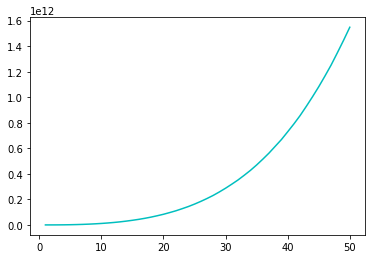

In [ ]:
mse_history = history.history['loss']
# mae_history = history.history['mae']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
# plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

In [ ]:

comparision1 = (model.predict(test_data))*100
Test_label = test_label*100

comparision1 = (model.predict(test_data))
Test_label = test_label
x_data = range(720)
# y_data_c1 = Test_label[:,0]
# y_data_c2 = Test_label[:,1]
# y_data_c3 = Test_label[:,2]
# y_predict1_c1 = comparision1[:,0]
# y_predict1_c2 = comparision1[:,1]
# y_predict1_c3 = comparision1[:,2]

# fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
# fig.suptitle('3 visual conditions_changed') 

# predict_c1.plot(x_data, y_data_c1 , 'r', label='truth_c1')
# predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
# predict_c3.plot(x_data, y_data_c3 , 'r', label='truth_c3')
# predict_c1.plot(x_data, y_predict1_c1 , 'g', label='predict1_c1')
# predict_c2.plot(x_data, y_predict1_c2 , 'g', label='predict1_c2')
# predict_c3.plot(x_data, y_predict1_c3 , 'g', label='predict1_c3')
# predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
# predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
# predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('/content/drive/My Drive/original4800_50epo_comparison1.png' ,dpi=1200)

r2_score(Test_label, comparision1, multioutput='uniform_average')     #[‘raw_values’, ‘uniform_average’, ‘variance_weighted’]

-1.729865374850756

In [ ]:
# data = np.load('/content/drive/My Drive/Newdata/shuffle_changedin4800.npy')
label = np.load('/content/drive/My Drive/Newdata/shuffle_changedout4800.npy')
data = np.reshape(data,(4800,30,116,116,1))
split_rate= 0.7
split = int(split_rate*4800)
train_data = data[:split]
train_label = label[:split]
test_data = data[split:]
test_label = label[split:] 


def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 50
  batchsize = 6
  R2 = []
  Comparision = []
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = Model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    comparision1 = (model.predict(test_data))*100
    Test_label = test_label*100
    Comparision.append(comparision1)
    # r2_score(Test_label, comparision1, multioutput='raw_values')
    R2.append(r2_score(Test_label, comparision1, multioutput='raw_values'))
    # val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    # mse_history = history.history['loss']
    # mae_history = history.history['mean_absolute_error']
    # val_mses.append(val_mse)
    # val_maes.append(val_mae)
    # mse_History.append(mse_history)
    # mae_History.append(mae_history)
  # return val_mses, val_maes, mse_History, mae_History
  return  R2,Comparision

R2_score, Predict_results = k_fold(5,train_data,train_label)


# average_mae_history = [(np.mean([x[i] for x in mae_history]))*100 for i in range(50)] 
# average_mse_history = [(np.mean([x[i] for x in mse_history]))*100 for i in range(50)] 
# #model 3Dcnn 
# epochs = range(1,len(average_mse_history)+1)
# plt.plot(epochs, average_mae_history,'c',  label='mae' )
# plt.plot(epochs, average_mse_history,'m',  label='mse' )
# plt.xlabel('Epochs')
# plt.ylabel('Validation')
# plt.show()


In [ ]:
mse_history = history.history['loss']
mae_history = history.history['mean_absolute_error'] 
comparision1 = (model.predict(test_data[:100]))*100
x_data = range(1080)
Test_label = test_label[:100]*100
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions') 
plt.subplots(figsize=(50, 10))
# fig, ax = plt.subplots(figsize=(20, 10))

predict_c1.plot(x_data, y_data_c1 , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'r', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'b', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'b', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b', label='predict1_c3')
from sklearn.metrics import r2_score
r2_score(Test_label, comparision1, multioutput='raw_values')

In [ ]:
# !cat ~/.keras/keras.json

# from keras import backend
# backend.set_image_data_format('channels_first')
# print(backend.image_data_format())

# !cat ~/.keras/keras.json

In [ ]:
# # print(open("~/.keras/keras.json").read())
# content = {"epsilon": 1e-07, 
#     "floatx": "float32", 
#     "image_data_format": "channels_first", 
#     "backend": "tensorflow"}
# with open(" ~/.keras/keras.json",'w') as f:
#   f.write(str(content))
# # print(open("~/.keras/keras.json").read())


In [ ]:

# tmp = data2[3,0,:,:]
# # np.set_printoptions(threshold=np.inf)  #打印全部内容 没有缩写
# print(tmp.shape)
# # print(tmp[:,:])
# tmp=tmp.astype(np.float) # conver to float  and plot 
# # %matplotlib qt 
# %matplotlib inline
# plt.imshow(tmp,cmap='GnBu')
# plt.savefig('/content/drive/My Drive/input_example.png' ,dpi=2400)


In [ ]:
# aaa = np.load('/content/drive/My Drive/output/M2.npy')
# ppp = aaa[0]
# print(ppp.shape)
# ppp=ppp.astype(np.float) # conver to float  and plot 
# # %matplotlib qt 
# %matplotlib inline
# plt.imshow(ppp,cmap='gray')
# plt.savefig('/content/drive/My Drive/output_example.png' ,dpi=2400)

In [ ]:
def SPLIT(data,split):

  data, label = shuffle(data, Label, random_state=20)

  train_data = data[:split]
  train_label = label[:split]
  test_data = data[split:]
  test_label = label[split:]

  return train_data, train_label, test_data, test_label


train_data, train_label, test_data, test_label = SPLIT(data,72)
# train_data1, train_label1, test_data1, test_label1 = SPLIT(data1,72)
# train_data2, train_label2, test_data2, test_label2 = SPLIT(data2,72)

In [ ]:
def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 100
  batchsize = 6
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = threeD_CNN()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mse_history = history.history['loss']
    mae_history = history.history['mean_absolute_error']
    val_mses.append(val_mse)
    val_maes.append(val_mae)
    mse_History.append(mse_history)
    mae_History.append(mae_history)
  return val_mses, val_maes, mse_History, mae_History

val_mses, val_maes, mse_history, mae_history = k_fold(4,train_data,train_label)


average_mae_history = [(np.mean([x[i] for x in mae_history]))*100 for i in range(100)] 
average_mse_history = [(np.mean([x[i] for x in mse_history]))*100 for i in range(100)] 
#model 3Dcnn 
epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, average_mae_history,'c',  label='mae' )
plt.plot(epochs, average_mse_history,'m',  label='mse' )
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()


In [ ]:
def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 100
  batchsize = 6
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = threeD_CNN1()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mse_history = history.history['loss']
    mae_history = history.history['mean_absolute_error']
    val_mses.append(val_mse)
    val_maes.append(val_mae)
    mse_History.append(mse_history)
    mae_History.append(mae_history)
  return val_mses, val_maes, mse_History, mae_History

val_mses1, val_maes1, mse_history1, mae_history1 = k_fold(4,train_data,train_label) 

average_mae_history1 = [(np.mean([x[i] for x in mae_history1]))*100 for i in range(100)] 
average_mse_history1= [(np.mean([x[i] for x in mse_history1]))*100 for i in range(100)] 
#model 3Dcnn 
epochs = range(1,len(average_mse_history1)+1)
plt.plot(epochs, average_mae_history1,'c',  label='mae' )
plt.plot(epochs, average_mse_history1,'m',  label='mse' )
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()
# batchsize = 6
# model1 = threeD_CNN()
# history1 = model1.fit(train_data, train_label, epochs = 100, batch_size = batchsize, verbose=0)
# model2 = threeD_CNN1()
# history2 = model2.fit(train_data, train_label, epochs = 100, batch_size = batchsize,verbose=0)
# model3 = threeD_CNN2()
# history3 = model3.fit(train_data, train_label, epochs = 100,batch_size = batchsize, verbose=0)


In [ ]:
def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 100
  batchsize = 6
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = threeD_CNN2()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mse_history = history.history['loss']
    mae_history = history.history['mean_absolute_error']
    val_mses.append(val_mse)
    val_maes.append(val_mae)
    mse_History.append(mse_history)
    mae_History.append(mae_history)
  return val_mses, val_maes, mse_History, mae_History

val_mses2, val_maes2, mse_history2, mae_history2 = k_fold(4,train_data,train_label) 

average_mae_history2 = [(np.mean([x[i] for x in mae_history2]))*100 for i in range(100)] 
average_mse_history2 = [(np.mean([x[i] for x in mse_history2]))*100 for i in range(100)] 
#model 3Dcnn 
epochs = range(1,len(average_mse_history2)+1)
plt.plot(epochs, average_mae_history2,'c',  label='mae' )
plt.plot(epochs, average_mse_history2,'m',  label='mse' )
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()
# batchsize = 6
# model1 = threeD_CNN()
# history1 = model1.fit(train_data, train_label, epochs = 100, batch_size = batchsize, verbose=0)
# model2 = threeD_CNN1()
# history2 = model2.fit(train_data, train_label, epochs = 100, batch_size = batchsize,verbose=0)
# model3 = threeD_CNN2()
# history3 = model3.fit(train_data, train_label, epochs = 100,batch_size = batchsize, verbose=0)


In [ ]:
epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, average_mae_history,'c',  label='mae' )
plt.plot(epochs, average_mse_history,'c--',  label='mse' )
plt.plot(epochs, average_mae_history1,'m',  label='mae1' )
plt.plot(epochs, average_mse_history1,'m--',  label='mse1' )
plt.plot(epochs, average_mae_history2,'r',  label='mae2' )
plt.plot(epochs, average_mse_history2,'r--',  label='mse2' )
plt.xlabel('Epochs')
plt.ylabel('Average_performance')
plt.legend()
# plt.show()
plt.savefig('/content/drive/My Drive/original_30_3models_comparison.png' ,dpi=1200)

In [ ]:
mse1 = history1.history['loss']
mae1 = history1.history['mean_absolute_error']
mse2 = history2.history['loss']
mae2 = history2.history['mean_absolute_error']
mse3 = history3.history['loss']
mae3 = history3.history['mean_absolute_error']
# val_loss = history.history['val_loss']
# acc = history.history['acc']
# val_acc=history.history['val_acc']
epochs = range(1,len(mse1) +1)
plt.plot(epochs, mse1, 'c', label='mse1')
plt.plot(epochs, mse2, 'm', label='mse2')
plt.plot(epochs, mse3, 'r', label='mse3')

plt.plot(epochs, mae1, 'c--', label='mae1')
plt.plot(epochs, mae2, 'm--', label='mae2')
plt.plot(epochs, mae3, 'r--', label='mae3')

plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 
# plt.savefig('/content/drive/My Drive/original_30_3models_comparison.png' ,dpi=2400)

In [ ]:
comparision1 = (model1.predict(test_data))*100
comparision2 =(model2.predict(test_data))*100
comparision3 = (model3.predict(test_data))*100
print(comparision1[0,0])
print(comparision2)


In [ ]:
x_data = range(24)
Test_label = test_label*100
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]
y_predict2_c1 = comparision2[:,0]
y_predict2_c2 = comparision2[:,1]
y_predict2_c3 = comparision2[:,2]
y_predict3_c1 = comparision3[:,0]
y_predict3_c2 = comparision3[:,1]
y_predict3_c3 = comparision3[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions') 


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict2_c1')
predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict2_c2')
predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict2_c3')

predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 
# fig.savefig('/content/drive/My Drive/ready_data_6C/matrix_input/1.png' ,bbox_inches='tight')

In [ ]:
print(comparision1.shape)
y_data_c1 = test_label[:,0]
print(y_data_c1.shape)

In [ ]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0]
  y_data_c2 = test_label[:,1]
  y_data_c3 = test_label[:,2]
  y_predict1_c1 = predict[:,0]
  y_predict1_c2 = predict[:,1]
  y_predict1_c3 = predict[:,2]
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(24):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1 /24 
  c2 = tmp2 /24
  c3 = tmp3 /24
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1 , c2 ,c3 


In [ ]:
# from keras import backend as K
Model1 = calculate_mse(comparision1)
Model2 = calculate_mse(comparision2)

In [ ]:
print(Model1)
print(Model2)